In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench import (perform_experiments, Model, RealParameter, ScalarOutcome,
                           Constant, ema_logging, MultiprocessingEvaluator)
from ema_workbench.em_framework.evaluators import MC

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
from recycle_model import recycle_model

In [3]:
model = Model('plastic', function=recycle_model)

model.uncertainties = [RealParameter('target', -0.05, 0.05),
                       RealParameter('percept', 0.1, 0.5),
                       RealParameter('knowledge', 0.1, 0.5),
                       RealParameter('frac_p_max', 0.1, 0.5),
                       RealParameter('frac_r_max', 0.5, 0.8),
                       RealParameter('budget_camp_prop', 0.3, 0.7),
                       RealParameter('infra', 0, 0.2),
                       RealParameter('ambitious', 0, 1)]

model.outcomes = [ScalarOutcome('plastic_prop',),
                  ScalarOutcome('recycle_prop'),
                  ScalarOutcome('target_met'),
                  ScalarOutcome('camp_bud_left')]

n_scenarios = 1000

In [4]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
def result_df(results):
    df_result = pd.DataFrame()
    for i, key in enumerate(results[1].keys()):
        df_result[key] = results[1][key]
    return df_result
df_result = result_df(results)
df_result.head()

,plastic_prop,recycle_prop,target_met,camp_bud_left
0,0.244394,0.124588,0.0,0.000000
1,0.269799,0.210602,0.5,0.114865
2,0.319541,0.187382,0.0,0.000000
3,0.438088,0.222945,0.0,0.000000
4,0.473043,0.259646,1.0,1.000000


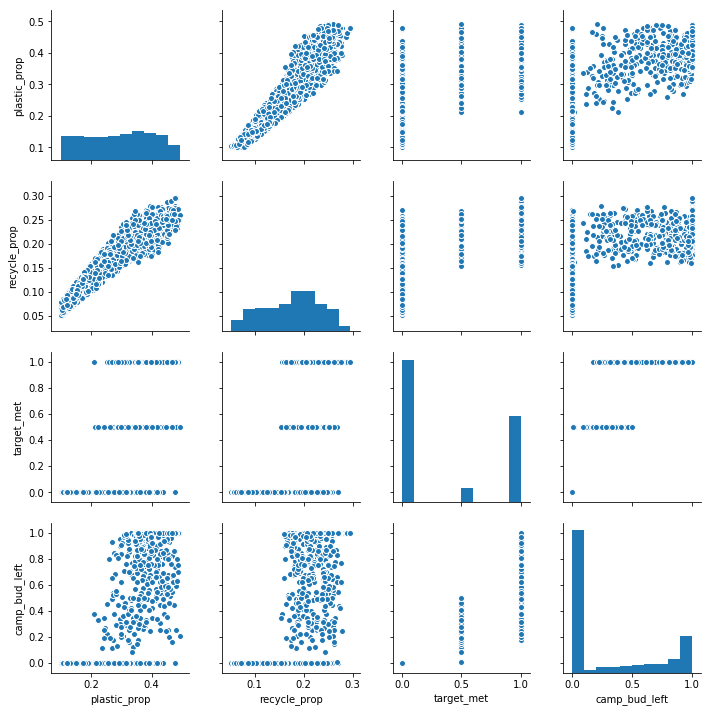

In [7]:
sns.pairplot(df_result)

In [8]:
def result_input(results):
    df_input = pd.DataFrame(index=list(results[0].dtype.names)[:8])
    for i in range(len(results[0])):
        df_input[i] = list(results[0][i])[:8]
    return df_input.T
df_input = result_input(results)
df_input.head()

,ambitious,budget_camp_prop,frac_p_max,frac_r_max,infra,knowledge,percept,target
0,0.739310,0.642984,0.244394,0.509785,0.036463,0.239835,0.464926,0.029073
1,0.940360,0.538472,0.269799,0.793102,0.158122,0.224270,0.271852,0.006058
2,0.171315,0.317720,0.319541,0.586410,0.068062,0.358263,0.156635,-0.018679
3,0.150362,0.522601,0.438088,0.508905,0.195167,0.215574,0.206384,0.048650
4,0.217204,0.631426,0.486508,0.688628,0.067764,0.283398,0.395295,-0.020996


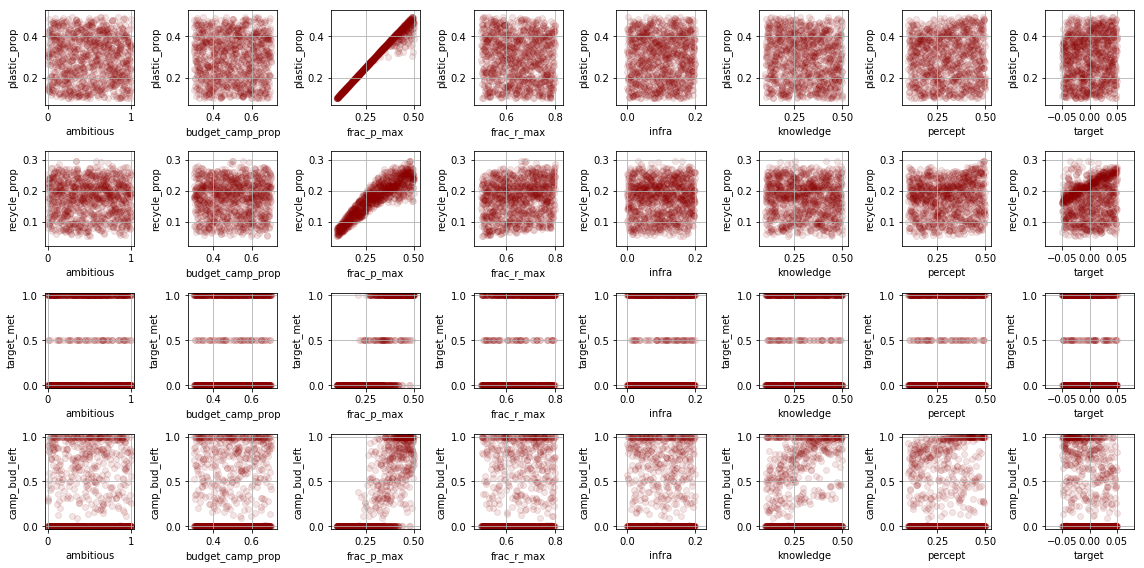

In [9]:
ncols = df_input.shape[1]
nrows = df_result.shape[1]

plt.figure(figsize=(ncols*2, nrows*2))
loc = 1
for j, ycol in enumerate(df_result):
    y = df_result[ycol]
    for i, xcol in enumerate(df_input):
        x = df_input[xcol]
        plt.subplot(nrows, ncols, loc)
        plt.scatter(x,y, color = "darkred", alpha = 0.1)
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.grid()
        plt.autoscale(tight=True)
        loc += 1
plt.tight_layout()